# La Liga Data Analysis

## Package Requirements & Database

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl

In [3]:
with sqlite3.connect("../laliga.sqlite") as con:
    df=pd.read_sql_query("SELECT * FROM Matches",con)
    dr=pd.read_sql_query("SELECT * FROM Predictions",con)

## Exercises

### Exercise 1
**Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there’s a tie) of all matches in the data. Write in the plot the percentage of each category.**

As can be seen in the pie chart below, it is indeed true that it is more likely for the home team to win, with a 52.8% chance. This is higher than the probability that there is a tie or that the away team wins.

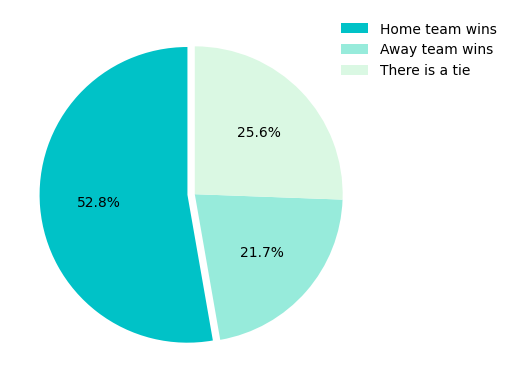

In [4]:
df = df.dropna(subset=['score'])

df["score_home_team"] = df["score"].str.split(":").str[0].astype(float)
df["score_away_team"] = df["score"].str.split(":").str[1].astype(float)

home_wins = (df['score_home_team'] > df['score_away_team']).sum()
away_wins = (df['score_home_team'] < df['score_away_team']).sum()
ties = (df['score_home_team'] == df['score_away_team']).sum()

sizes = [home_wins, away_wins, ties]
labels = ['Home team wins', 'Away team wins', 'There is a tie']
explode = (0.05, 0.0, 0.0)
colors = ['#00c2c7', '#97ebdb', '#daf8e3']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=['','',''], autopct='%1.1f%%', startangle=90, colors=colors)
ax.legend(wedges, labels, loc="upper right", bbox_to_anchor=(1.35, 1), fancybox=True, edgecolor='black', frameon=False)

plt.show()

### Exercise 2
**What are the top ten scoring teams of all time? What are the ten teams that concede the most? Make two bar plot charts showing each of them. Consider only matches played in 1st division. What have been the biggest wins? Of course, when we say _biggest_ we mean those with the highest goal difference. Show the top ten of them in a table.**

The ten highest scorers of the first division of La Liga can be seen in the two bar plot charts, respectively.

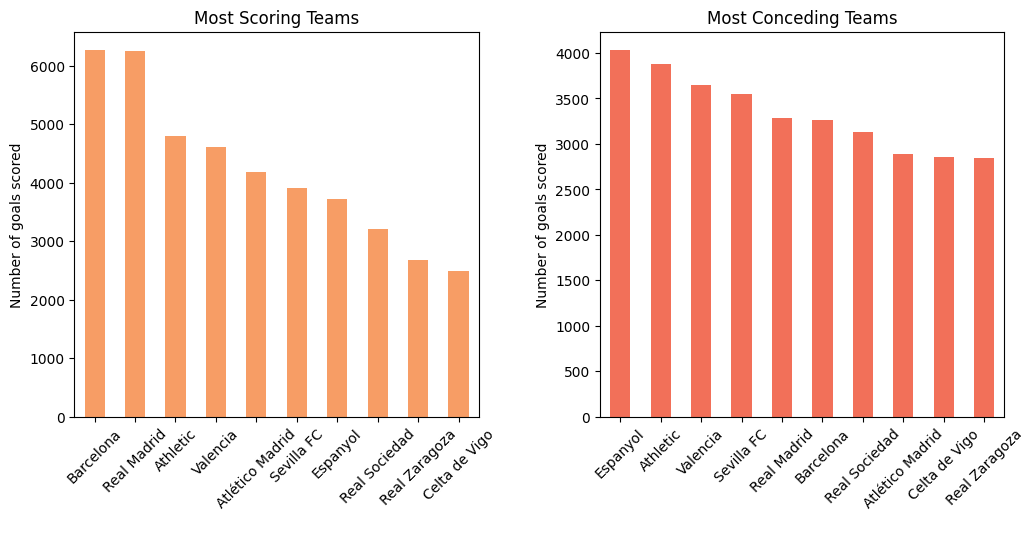

In [5]:
df_first_division = df[df['division'] == 1].copy()  # make a copy of the dataframe to avoid a warning

goals_scored = df_first_division.groupby('home_team')['score_home_team'].sum() + df_first_division.groupby('away_team')['score_away_team'].sum()
top_scorers = goals_scored.sort_values(ascending=False).head(10)

goals_conceded = df_first_division.groupby('home_team')['score_away_team'].sum() + df_first_division.groupby('away_team')['score_home_team'].sum()
top_conceders = goals_conceded.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5)) # increase the figure size for wider subplots

plt.subplot(1, 2, 1)
top_scorers.plot(x='nombre', y='valor', kind='bar', color='#f79d65')
plt.xlabel(' ')
plt.ylabel('Number of goals scored')
plt.title('Most Scoring Teams')
plt.tick_params(axis='x', rotation=45)

plt.subplot(1, 2, 2)
top_conceders.plot(x='nombre', y='valor', kind='bar', color='#f27059')
plt.xlabel(' ')
plt.ylabel('Number of goals scored')
plt.title('Most Conceding Teams')
plt.tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.3)  # add space between subplots
plt.show()

When it comes to the highest difference in scores per match in the first division, a table has also been created to display this information. As a highlight, the biggest difference there has ever been recorded until the moment the data was taken is 11 goals in an Athletic vs. Barcelona match.

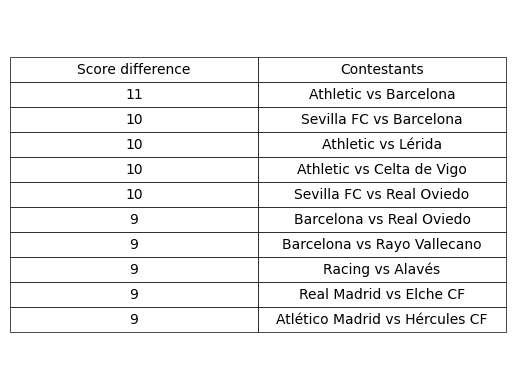

In [6]:
df_first_division['score_difference'] = np.abs(df_first_division["score_home_team"] - df_first_division["score_away_team"])
df_first_division['game_name'] = df_first_division["home_team"] + ' vs ' + df_first_division["away_team"]
differences = df_first_division.iloc[:, -2:].sort_values(by='score_difference', ascending=False).head(10)

fig, ax = plt.subplots()

differences['score_difference'] = differences['score_difference'].astype(int)
table = ax.table(cellText=differences.values, colLabels=['Score difference', 'Contestants'], loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
ax.axis('off')
# change the border width of the table
for key, cell in table._cells.items():
    cell.set_linewidth(0.5)

plt.show()

### Exercise 3
**There has been a lot of discussion about how LaLiga’s television rights have changed game schedules in the last years. Make a bar plot chart showing the number of matches played each weekday, and make also a histogram of match time. Compare this two graphics between seasons 2000-2001 and 2020-2021.**

As can be seen in the bar plots below, this seems to indeed be the case if we consider the differences of the distributions number of games per day of the week in seasons 2000-2001 and 2020-2021. The games played in the 2000-2001 season are mostly concentrated around Saturday and Sunday, whereas the ones played in 2020-2021 are more distributed onto the weedays as well.

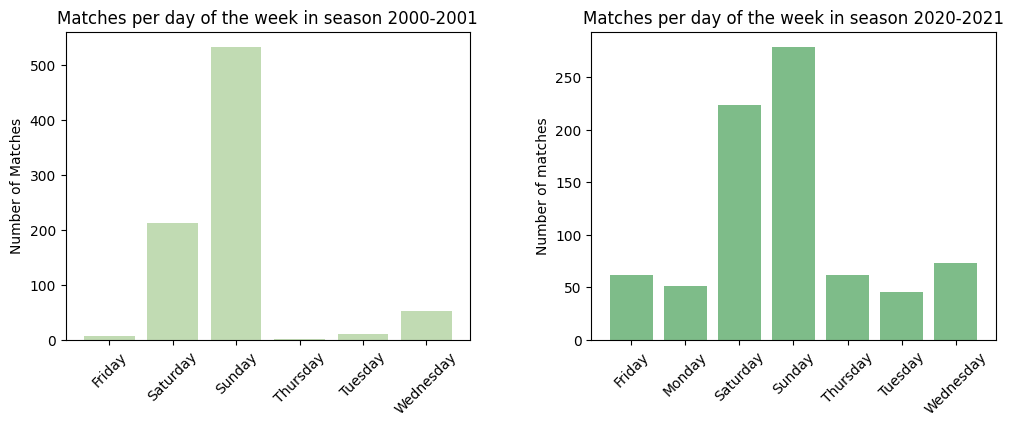

In [7]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Filter and plot data for 2000-2001
plt.subplot(1, 2, 1)
start_date_2000 = pd.Timestamp('2000-01-01')
end_date_2000 = pd.Timestamp('2000-12-31')
df_2000 = df[(df['date'] >= start_date_2000) & (df['date'] <= end_date_2000)]
day_of_week_counts_2000 = df_2000['date'].dt.day_name().value_counts().sort_index()
plt.bar(day_of_week_counts_2000.index, day_of_week_counts_2000, color='#c1dbb3')
plt.xlabel(' ')
plt.ylabel('Number of Matches')
plt.title('Matches per day of the week in season 2000-2001')
plt.tick_params(axis='x', rotation=45)

# Filter and plot data for 2020-2021
plt.subplot(1, 2, 2)
start_date_2020 = pd.Timestamp('2020-01-01')
end_date_2021 = pd.Timestamp('2020-12-31')
df_2020 = df[(df['date'] >= start_date_2020) & (df['date'] <= end_date_2021)]
day_of_week_counts_2020 = df_2020['date'].dt.day_name().value_counts().sort_index()
plt.bar(day_of_week_counts_2020.index, day_of_week_counts_2020, color='#7ebc89')
plt.xlabel(' ')
plt.ylabel('Number of matches')
plt.title('Matches per day of the week in season 2020-2021')
plt.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)  # add space between subplots

plt.show()

A histogram of the times can be seen below.

**ACI TENIM UN PROBLEMA PERQUE A LA DATAFRAME EN LA CATEGORIA 'TIME' POSA 'NONE' EN QUASI TOTES ALESHORES NO SE COM FER EL HISTOGRAMA SENSE DADEEEEEEEES HAHAH**

### Exercise 4

#### Build a cross results table for season 2020-2021 (1st division). 

The code below, when executed, displays a cross table in which if the home team wins the background is color green, if the away team wins the background color is red and if there is a tie the background color is orange. 

In [8]:
#here we are creating a data frame with the results from the first division in season 2020-2021
df_season20_21=df_first_division[df_first_division['season']=='2020-2021'] 
#creation of the table
table=df_season20_21.pivot(index='home_team', columns='away_team',values='score')
table=table.fillna('-')

#function for coloring the table according to who wins de match
def coloring(value):
    if value=='-':
        return '' #the values of the table with '-' don't get coloured!!
    else:
        parts=value.split(":") #we are extracting the ':' in order to be able to compare scores!!!
        home_score=int(parts[0])
        away_score=int(parts[1])  
        if home_score>away_score:
            return 'background-color: rgba(144, 238, 144,0.55)'
        if home_score<away_score:
            return 'background-color: rgba(255, 37, 44,0.7)'
        if home_score==away_score:
            return 'background-color:rgb(255,179,71); color:black'
    
colored_table=table.style.map(coloring) 
display(colored_table)

away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,-,1:0,1:2,1:1,0:1,1:3,1:1,0:2,0:0,4:2,2:2,0:1,1:4,0:0,1:0,2:1,1:0,1:2,2:2,2:1
Athletic,0:0,-,2:1,2:3,2:2,0:2,0:1,1:0,5:1,2:1,2:0,4:0,0:1,0:1,2:2,1:1,2:0,2:1,1:1,1:1
Atlético Madrid,1:0,2:1,-,1:0,2:1,2:2,4:0,3:1,1:0,6:1,0:2,2:0,1:1,2:1,2:0,5:0,2:0,2:0,3:1,0:0
Barcelona,5:1,2:1,0:0,-,4:0,1:2,1:1,3:0,5:2,1:2,1:0,5:2,1:3,2:1,1:0,1:1,4:1,1:1,2:2,4:0
CA Osasuna,1:1,1:0,1:3,0:2,-,2:0,3:2,2:0,0:0,3:1,1:3,0:2,0:0,0:1,0:0,2:1,1:1,0:2,3:1,1:3
Celta de Vigo,2:0,0:0,0:2,0:3,2:1,-,4:0,3:1,1:0,3:1,2:0,2:3,1:3,1:4,1:1,1:1,2:1,3:4,2:1,0:4
Cádiz CF,3:1,0:4,2:4,2:1,0:2,0:0,-,1:3,0:2,1:1,2:2,0:1,0:3,0:1,0:0,1:0,2:1,1:3,2:1,0:0
Elche CF,0:2,2:0,0:1,0:2,2:2,1:1,1:1,-,1:3,0:1,1:0,1:1,1:1,0:3,1:1,1:0,0:0,2:1,2:1,2:2
Getafe,0:0,1:1,0:0,1:0,1:0,1:1,0:1,1:1,-,0:1,2:1,3:0,0:0,0:1,0:1,0:1,1:0,0:1,3:0,1:3


#### Could you model the intensity of this background color with the goal difference from the match?

The code below does the same as the one in the cell above, but now we asign a difference intensity of the code according to the value of the difference between the score of the home team and the away team: as more different are the scores, the brighter the color gets.

In [9]:
df_season20_21=df_first_division[df_first_division['season']=='2020-2021']
table=df_season20_21.pivot(index='home_team', columns='away_team',values='score')
table=table.fillna('-')
#here we are calculating the maximum diference between scores that there is when the home team wins and when the away team wins
max_dif_homewins=(df_season20_21['score_home_team']-df_season20_21['score_away_team']).max()
max_dif_awaywins=(-df_season20_21['score_home_team']+df_season20_21['score_away_team']).max()

#function for coloring, now with gradients :)
def coloring_gradients(value):
    if value=='-':
        return '' 
    else:
        parts=value.split(":")
        home_score=float(parts[0])
        away_score=float(parts[1])
        if home_score>away_score:
            alpha=(home_score-away_score)/max_dif_homewins #this is the transparency that the cell acquires, as more difference, the less transparency there is
            if alpha>=0.8:
                return f'background-color:rgba(144, 238, 144, {alpha});color:black' #so the letters can be read!!!
            else:
                return f'background-color:rgba(144, 238, 144, {alpha});color:white'  
        if home_score<away_score:
            alpha=(-home_score+away_score)/max_dif_awaywins
            return f'background-color:rgba(255, 37, 44, {alpha})'
        if home_score==away_score:
            return 'background-color:rgb(255,179,71); color:black'
    
colored_table=table.style.map(coloring_gradients)

display(colored_table)

away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,-,1:0,1:2,1:1,0:1,1:3,1:1,0:2,0:0,4:2,2:2,0:1,1:4,0:0,1:0,2:1,1:0,1:2,2:2,2:1
Athletic,0:0,-,2:1,2:3,2:2,0:2,0:1,1:0,5:1,2:1,2:0,4:0,0:1,0:1,2:2,1:1,2:0,2:1,1:1,1:1
Atlético Madrid,1:0,2:1,-,1:0,2:1,2:2,4:0,3:1,1:0,6:1,0:2,2:0,1:1,2:1,2:0,5:0,2:0,2:0,3:1,0:0
Barcelona,5:1,2:1,0:0,-,4:0,1:2,1:1,3:0,5:2,1:2,1:0,5:2,1:3,2:1,1:0,1:1,4:1,1:1,2:2,4:0
CA Osasuna,1:1,1:0,1:3,0:2,-,2:0,3:2,2:0,0:0,3:1,1:3,0:2,0:0,0:1,0:0,2:1,1:1,0:2,3:1,1:3
Celta de Vigo,2:0,0:0,0:2,0:3,2:1,-,4:0,3:1,1:0,3:1,2:0,2:3,1:3,1:4,1:1,1:1,2:1,3:4,2:1,0:4
Cádiz CF,3:1,0:4,2:4,2:1,0:2,0:0,-,1:3,0:2,1:1,2:2,0:1,0:3,0:1,0:0,1:0,2:1,1:3,2:1,0:0
Elche CF,0:2,2:0,0:1,0:2,2:2,1:1,1:1,-,1:3,0:1,1:0,1:1,1:1,0:3,1:1,1:0,0:0,2:1,2:1,2:2
Getafe,0:0,1:1,0:0,1:0,1:0,1:1,0:1,1:1,-,0:1,2:1,3:0,0:0,0:1,0:1,0:1,1:0,0:1,3:0,1:3


#### Write a function that, given the season ant the division, plots the cross section results table

Since we have two types of table created, we have two functions according to the type of colors you want (if you want the gradient or not).

Table without the gradient:

In [10]:
def table_for_any_season(x,y):
    df_unknown_div= df[df['division']==x]
    df_any_season=df_unknown_div[df_unknown_div['season']==y]
    table_any_seas=df_any_season.pivot_table(index='home_team', columns='away_team',values='score',aggfunc=list,fill_value='-',margins=False)
    table_any_seas=table.fillna('-')
    colored_table=table_any_seas.style.map(coloring) 
    return colored_table
#If you want to try the function with more values make sure to put first the number of the division (1 or 2) and the season with format 'year-year'
display(table_for_any_season(1,'2013-2012')) 

away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,-,1:0,1:2,1:1,0:1,1:3,1:1,0:2,0:0,4:2,2:2,0:1,1:4,0:0,1:0,2:1,1:0,1:2,2:2,2:1
Athletic,0:0,-,2:1,2:3,2:2,0:2,0:1,1:0,5:1,2:1,2:0,4:0,0:1,0:1,2:2,1:1,2:0,2:1,1:1,1:1
Atlético Madrid,1:0,2:1,-,1:0,2:1,2:2,4:0,3:1,1:0,6:1,0:2,2:0,1:1,2:1,2:0,5:0,2:0,2:0,3:1,0:0
Barcelona,5:1,2:1,0:0,-,4:0,1:2,1:1,3:0,5:2,1:2,1:0,5:2,1:3,2:1,1:0,1:1,4:1,1:1,2:2,4:0
CA Osasuna,1:1,1:0,1:3,0:2,-,2:0,3:2,2:0,0:0,3:1,1:3,0:2,0:0,0:1,0:0,2:1,1:1,0:2,3:1,1:3
Celta de Vigo,2:0,0:0,0:2,0:3,2:1,-,4:0,3:1,1:0,3:1,2:0,2:3,1:3,1:4,1:1,1:1,2:1,3:4,2:1,0:4
Cádiz CF,3:1,0:4,2:4,2:1,0:2,0:0,-,1:3,0:2,1:1,2:2,0:1,0:3,0:1,0:0,1:0,2:1,1:3,2:1,0:0
Elche CF,0:2,2:0,0:1,0:2,2:2,1:1,1:1,-,1:3,0:1,1:0,1:1,1:1,0:3,1:1,1:0,0:0,2:1,2:1,2:2
Getafe,0:0,1:1,0:0,1:0,1:0,1:1,0:1,1:1,-,0:1,2:1,3:0,0:0,0:1,0:1,0:1,1:0,0:1,3:0,1:3


Table with the gradient:

In [11]:
def table_for_any_season_with_gradient(x,y):
    df_unknown_div= df[df['division']==x]
    df_any_season=df_unknown_div[df_unknown_div['season']==y]
    table_any_seas=df_any_season.pivot_table(index='home_team', columns='away_team',values='score',aggfunc=list,fill_value='-',margins=False)
    table_any_seas=table.fillna('-')
    colored_table_gradient=table_any_seas.style.map(coloring_gradients) 
    return colored_table_gradient
#same recquirements as before, first write the function (1 or 2) and then the season as 'year-year'
display(table_for_any_season_with_gradient(2,'2001-2000'))


away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,-,1:0,1:2,1:1,0:1,1:3,1:1,0:2,0:0,4:2,2:2,0:1,1:4,0:0,1:0,2:1,1:0,1:2,2:2,2:1
Athletic,0:0,-,2:1,2:3,2:2,0:2,0:1,1:0,5:1,2:1,2:0,4:0,0:1,0:1,2:2,1:1,2:0,2:1,1:1,1:1
Atlético Madrid,1:0,2:1,-,1:0,2:1,2:2,4:0,3:1,1:0,6:1,0:2,2:0,1:1,2:1,2:0,5:0,2:0,2:0,3:1,0:0
Barcelona,5:1,2:1,0:0,-,4:0,1:2,1:1,3:0,5:2,1:2,1:0,5:2,1:3,2:1,1:0,1:1,4:1,1:1,2:2,4:0
CA Osasuna,1:1,1:0,1:3,0:2,-,2:0,3:2,2:0,0:0,3:1,1:3,0:2,0:0,0:1,0:0,2:1,1:1,0:2,3:1,1:3
Celta de Vigo,2:0,0:0,0:2,0:3,2:1,-,4:0,3:1,1:0,3:1,2:0,2:3,1:3,1:4,1:1,1:1,2:1,3:4,2:1,0:4
Cádiz CF,3:1,0:4,2:4,2:1,0:2,0:0,-,1:3,0:2,1:1,2:2,0:1,0:3,0:1,0:0,1:0,2:1,1:3,2:1,0:0
Elche CF,0:2,2:0,0:1,0:2,2:2,1:1,1:1,-,1:3,0:1,1:0,1:1,1:1,0:3,1:1,1:0,0:0,2:1,2:1,2:2
Getafe,0:0,1:1,0:0,1:0,1:0,1:1,0:1,1:1,-,0:1,2:1,3:0,0:0,0:1,0:1,0:1,1:0,0:1,3:0,1:3


### Exercise 5

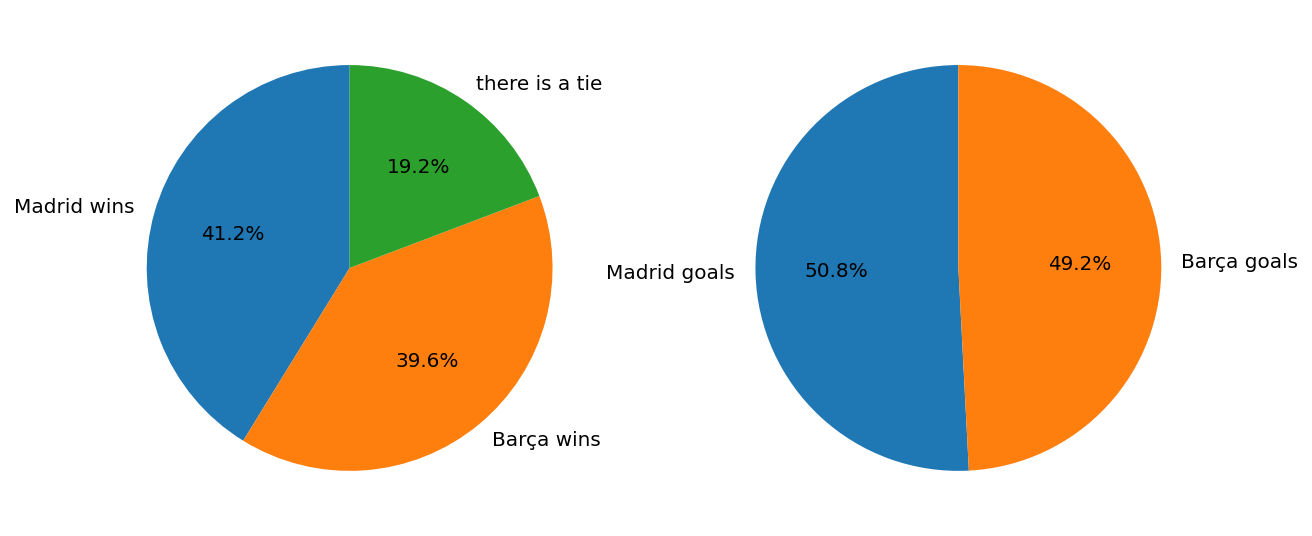

In [12]:
df_home_madrid = df[df['home_team'] == 'Real Madrid'] [df[df['home_team'] == 'Real Madrid'] ['away_team'] == 'Barcelona']
goals_madrid = df_home_madrid['score_home_team'].sum()
df_home_barca = df[df['home_team'] == 'Barcelona'] [df[df['home_team'] == 'Barcelona'] ['away_team'] == 'Real Madrid']
goals_barca = df_home_barca['score_home_team'].sum()

df_bar_vs_mad = pd.concat([df_home_madrid, df_home_barca])

madrid_wins = (df_home_madrid['score_home_team'] > df_home_madrid['score_away_team']).sum() + (df_home_barca['score_home_team'] < df_home_barca['score_away_team']).sum()
barca_wins = (df_home_barca['score_home_team'] > df_home_barca['score_away_team']).sum() + (df_home_madrid['score_home_team'] < df_home_madrid['score_away_team']).sum()
ties = (df_bar_vs_mad['score_home_team'] == df_bar_vs_mad['score_away_team']).sum()

sizes = [madrid_wins, barca_wins, ties]
labels = ['Madrid wins', 'Barça wins', 'there is a tie']

fig = plt.figure(figsize=(10,10),dpi=144)

ax1 = fig.add_subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

sizes = [goals_madrid, goals_barca]
labels = ['Madrid goals', 'Barça goals']

ax2 = fig.add_subplot(122)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

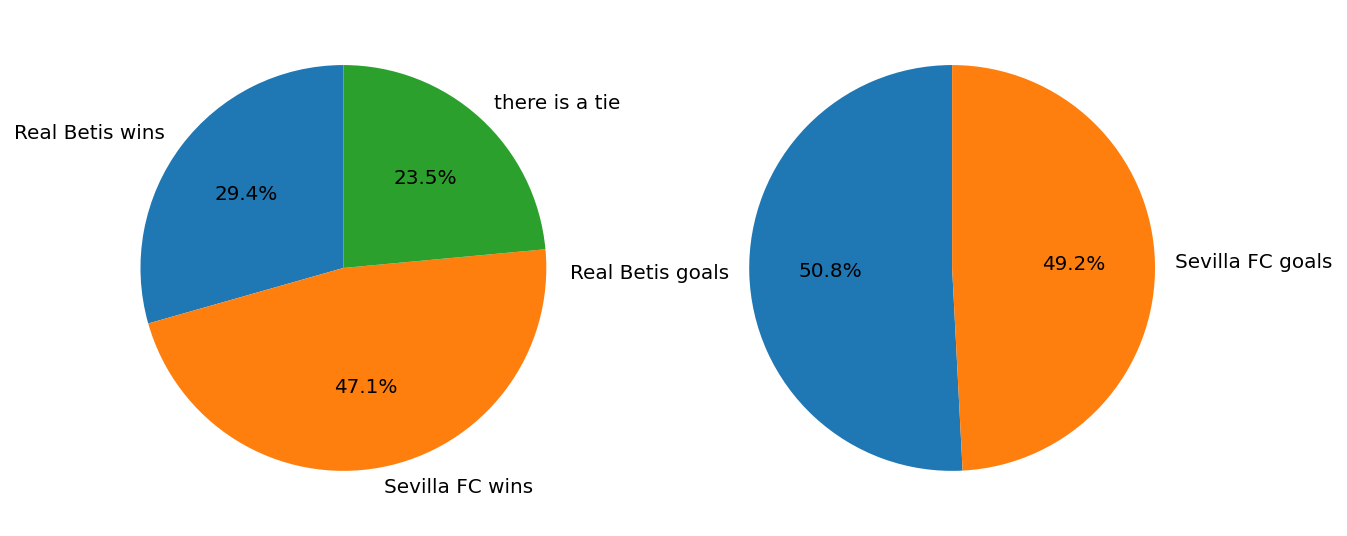

In [13]:
#function exercise 5
def plot_direct_confontations_stats(team1,team2):
    df_home_team1 = df[df['home_team'] == team1] [df[df['home_team'] == team1] ['away_team'] == team2]
    goals_team1 = df_home_team1['score_home_team'].sum()
    df_home_team2 = df[df['home_team'] == team2] [df[df['home_team'] == team2] ['away_team'] == team1]
    goals_team2 = df_home_team2['score_home_team'].sum()

    df_team1_vs_team2 = pd.concat([df_home_team1, df_home_team2])

    team1_wins = (df_home_team1['score_home_team'] > df_home_team1['score_away_team']).sum() + (df_home_team2['score_home_team'] < df_home_team2['score_away_team']).sum()
    team2_wins = (df_home_team2['score_home_team'] > df_home_team2['score_away_team']).sum() + (df_home_team1['score_home_team'] < df_home_team1['score_away_team']).sum()
    ties = (df_team1_vs_team2['score_home_team'] == df_team1_vs_team2['score_away_team']).sum()

    sizes = [team1_wins, team2_wins, ties]
    labels = [team1 + ' wins', team2 + ' wins', 'there is a tie']

    fig = plt.figure(figsize=(10,10),dpi=144)

    ax1 = fig.add_subplot(121)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    sizes = [goals_madrid, goals_barca]
    labels = [team1 + ' goals', team2 + ' goals']

    ax2 = fig.add_subplot(122)
    ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.show()

plot_direct_confontations_stats('Real Betis','Sevilla FC')

### Exercise 6

### Exercise 7

In [14]:
df['Winner'] = np.where(df['score_home_team'] > df['score_away_team'],1,np.where(df['score_home_team'] < df['score_away_team'],0,-1))

def func_home_wins(data):
    return (data[data == 1]).count()

def func_away_wins(data):
    return (data[data == 0]).count()

def func_tie(data):
    return (data[data == -1]).count()

df_class_home = df.groupby(['division','season','home_team']).agg(
    GF = pd.NamedAgg(column='score_home_team', aggfunc='sum'),
    GA = pd.NamedAgg(column='score_away_team', aggfunc='sum'),
    W = pd.NamedAgg(column='Winner', aggfunc=func_home_wins),
    L = pd.NamedAgg(column='Winner', aggfunc=func_away_wins),
    T = pd.NamedAgg(column='Winner', aggfunc=func_tie)
    ).reset_index()
df_class_away = df.groupby(['division','season','away_team']).agg(
    GF = pd.NamedAgg(column='score_away_team', aggfunc='sum'),
    GA = pd.NamedAgg(column='score_home_team', aggfunc='sum'),
    W = pd.NamedAgg(column='Winner', aggfunc=func_away_wins),
    L = pd.NamedAgg(column='Winner', aggfunc=func_home_wins),
    T = pd.NamedAgg(column='Winner', aggfunc=func_tie)
    ).reset_index()

df_class_away.rename(columns={'away_team': 'team'}, inplace=True)
df_class_home.rename(columns={'home_team':'team'},inplace=True)

df_classifiaction = df_class_away.merge(df_class_home,how='outer')

df_classifiaction=df_classifiaction.groupby(['season','team','division']).sum().reset_index()


df_classifiaction['GD'] = df_classifiaction['GF'] - df_classifiaction['GA']
df_classifiaction['Pts'] = (df_classifiaction['W']) * 3 + df_classifiaction['T']

df_classifiaction


df_classifiaction['year_of_start']=df_classifiaction['season'].str.split("-").str[0].astype(int)
 


df_classifiaction_ordered = df_classifiaction.sort_values(by=['year_of_start'], ascending=False)

df_classifiaction_ordered=df_classifiaction.sort_values(by=['year_of_start','division'],ascending=[False,True])

df_classifiaction_ordered=df_classifiaction.sort_values(by=['year_of_start','division','Pts'], ascending=[False,True,False])

df_classifiaction_ordered=df_classifiaction.sort_values(by=['year_of_start','division','Pts','GD'],ascending=[False,True,False,False])

df_classifiaction_ordered=df_classifiaction.sort_values(by=['year_of_start','division','Pts','GD','GF'],ascending=[False,True,False,False,False])

df_classifiaction_ordered=df_classifiaction_ordered.reset_index(drop=True)

df_classifiaction_ordered['Rank']=df_classifiaction_ordered.groupby(['year_of_start','division']).cumcount()+1

df_final_classification_ordered=df_classifiaction_ordered.drop(columns=['year_of_start'])

df_final_classification_ordered
#df_final_classification_ordered.to_excel('SeasonStandings.xlsx')

,season,team,division,GF,GA,W,L,T,GD,Pts,Rank
0,2021-2022,Real Madrid,1,8.0,4.0,2,0,1,4.0,7,1
1,2021-2022,Sevilla FC,1,5.0,1.0,2,0,1,4.0,7,2
2,2021-2022,Valencia,1,5.0,1.0,2,0,1,4.0,7,3
3,2021-2022,Barcelona,1,7.0,4.0,2,0,1,3.0,7,4
4,2021-2022,Atlético Madrid,1,5.0,3.0,2,0,1,2.0,7,5
...,...,...,...,...,...,...,...,...,...,...,...
2781,1928-1929,Athletic Madrid,1,43.0,41.0,8,8,2,2.0,26,6
2782,1928-1929,Espanyol,1,32.0,38.0,7,7,4,-6.0,25,7
2783,1928-1929,Catalunya,1,45.0,49.0,6,8,4,-4.0,22,8
2784,1928-1929,Real Unión,1,40.0,42.0,5,11,2,-2.0,17,9


### Exercise 8

### Exercise 9

In [15]:
def division_changes(data):
    return ((data != data.shift()).astype(int)).count()

df_division_changes = df.groupby(['home_team'])['division'].agg(division_changes).reset_index()
df_top5_elevator_teams = df_division_changes.sort_values(by='division', ascending=False).head(5).reset_index()
list_elevator_teams = df_top5_elevator_teams['home_team'].tolist()

### Exercise 10

In [16]:
df_class_home = df.groupby(['division', 'season', 'matchday', 'home_team','Winner']).agg(
    GF_safe = pd.NamedAgg(column='score_home_team', aggfunc='sum'),
    GA_safe = pd.NamedAgg(column='score_away_team', aggfunc='sum')
    ).reset_index()
df_class_away = df.groupby(['division', 'season', 'matchday', 'away_team', 'Winner']).agg(
    GF_safe = pd.NamedAgg(column='score_away_team', aggfunc='sum'),
    GA_safe = pd.NamedAgg(column='score_home_team', aggfunc='sum')
    ).reset_index()

In [39]:
def calculate_last_5(row):
    index = row.index
    #if index < 5:  # Extract the index of the row as an integer
    #    return df_classifiaction['last_1'].loc[index - 4:index].values.tolist()
    return row.loc[index - 4:index].values.tolist()

def last_5_results(group):
    last_5 = []
    for i in range(5):
        last_5.append(group.shift(i))
    return last_5

def custom_agg_func5(group):
    # Apply rolling window of size 5 and extract the values
    prev_5_values = [x.values.tolist() for x in group.rolling(5)]
    #return pd.Series({'last_5': prev_5_values})
    return prev_5_values


In [40]:
df_class_home['W_safe'] = np.where(df_class_home['Winner'] == 1 , 1 ,0)
df_class_home['L_safe'] = np.where(df_class_home['Winner'] == 0 , 1 ,0)
df_class_home['T_safe'] = np.where(df_class_home['Winner'] == -1 , 1 ,0)

df_class_away['W_safe'] = np.where(df_class_away['Winner'] == 0 , 1 ,0)
df_class_away['L_safe'] = np.where(df_class_away['Winner'] == 1 , 1 ,0)
df_class_away['T_safe'] = np.where(df_class_away['Winner'] == -1 , 1 ,0)

df_class_away.rename(columns={'away_team':'team'}, inplace=True)
df_class_home.rename(columns={'home_team':'team'}, inplace=True)
df_classifiaction = df_class_away.merge(df_class_home,how='outer')
df_classifiaction = df_classifiaction.groupby(['season', 'division','matchday','team']).sum().reset_index()

df_classifiaction['last_1'] = np.where(df_classifiaction['W_safe']==1,'W',np.where(df_classifiaction['L_safe']==1,'L','T'))
#df_classifiaction_b= df_classifiaction.groupby(['season','division','team'])['last_1'].apply(last_5_results).reset_index()

#df_classifiaction = df_classifiaction.merge(df_classifiaction_b, on=['season', 'division', 'team'], how='left')

df_classifiaction[['W','L','T','GF','GA']] = df_classifiaction.groupby([ 'division','season','team'])[['W_safe','L_safe','T_safe','GF_safe','GA_safe']].cumsum()

df_classifiaction['GD'] = df_classifiaction['GF'] - df_classifiaction['GA']
df_classifiaction['Pts'] = (df_classifiaction['W']) * 3 + df_classifiaction['T']
df_classifiaction['year_of_start']=df_classifiaction['season'].str.split("-").str[0].astype(int)

df_classifiaction_ordered = df_classifiaction.sort_values(by=['year_of_start'], ascending=False)
df_classifiaction_ordered = df_classifiaction_ordered.sort_values(by=['year_of_start','division'],ascending=[False,True])
df_classifiaction_ordered['last_5'] = df_classifiaction_ordered['last_1'].apply(calculate_last_5)
df_classifiaction_ordered = df_classifiaction_ordered.sort_values(by=['year_of_start','division','matchday'], ascending=[False,True,True])
df_classifiaction_ordered = df_classifiaction_ordered.sort_values(by=['year_of_start','division','matchday', 'Pts'],ascending=[False,True,True,False])
df_classifiaction_ordered = df_classifiaction_ordered.sort_values(by=['year_of_start','division','matchday', 'Pts','GD'],ascending=[False,True,True,False,False])
df_classifiaction_ordered = df_classifiaction_ordered.sort_values(by=['year_of_start','division','matchday', 'Pts', 'GD', 'GF'],ascending=[False,True,True,False,False,False]).reset_index(drop=True)

# df_classifiaction_ordered = df_classifiaction_ordered.groupby(['season','team','matchday'])['last_1'].agg(last_5_results)

#df_classifiaction_ordered.head(30)


df_classifiaction_ordered


AttributeError: 'str' object has no attribute 'loc'